In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


In [14]:
X_all = pd.read_csv("data/X_train.csv", encoding='cp949')
y_all = pd.read_csv("data/y_train.csv", encoding='cp949')

In [15]:
print(X_all.head())
print(X_all.info())
print(X_all.describe())
print(X_all.corr())

   cust_id      총구매액     최대구매액       환불금액   주구매상품 주구매지점  내점일수   내점당구매건수  \
0        0  68282840  11264000  6860000.0      기타   강남점    19  3.894737   
1        1   2136000   2136000   300000.0     스포츠   잠실점     2  1.500000   
2        2   3197000   1639000        NaN  남성 캐주얼   관악점     2  2.000000   
3        3  16077620   4935000        NaN      기타   광주점    18  2.444444   
4        4  29050000  24000000        NaN      보석  본  점     2  1.500000   

     주말방문비율  구매주기  
0  0.527027    17  
1  0.000000     1  
2  0.000000     1  
3  0.318182    16  
4  0.000000    85  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500

In [17]:
X_all['target']= y_all['gender']
X_all.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,target
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0


In [42]:
man = X_all[X_all['target']==1]['주구매지점'].value_counts()
man

본  점     434
잠실점      169
분당점      154
영등포점      99
부산본점      82
일산점       70
광주점       46
강남점       37
청량리점      37
미아점       30
노원점       28
대전점       25
관악점       19
부평점       17
동래점       17
인천점       16
안양점       15
대구점        5
전주점        5
포항점        4
센텀시티점      3
울산점        3
창원점        1
Name: 주구매지점, dtype: int64

In [44]:
def bar_chart(feature):
    man = X_all[X_all['target']==1][feature].value_counts()
    female = X_all[X_all['target']==0][feature].value_counts()
    df= pd.DataFrame([man, female])
    df.index= ['man','female']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

/root/venv/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/venv/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/venv/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/venv/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/venv/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/venv/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.

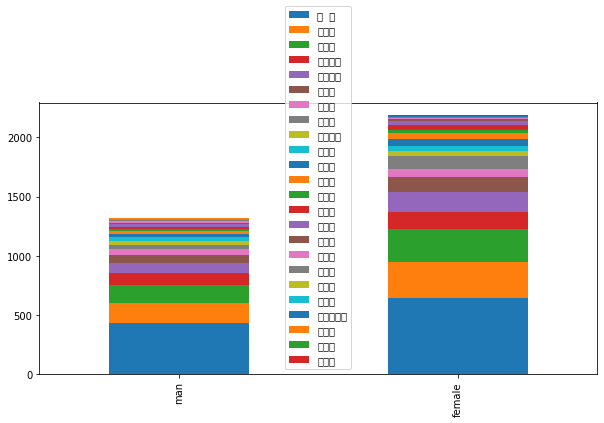

In [47]:
bar_chart('주구매지점')